# VGGtest

In [1]:
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from keras import applications
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datasetpath = r'C:\Users\SurfacePro4\Desktop\dataset'
batch_size = 32
img_size = 128
vggmodel = applications.VGG16(include_top=False, weights='imagenet')

vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split = 0.2)

Using TensorFlow backend.


In [2]:
train_generator = vgg_data_gen.flow_from_directory(
        r'C:\Users\SurfacePro4\Desktop\pongAI\dataset\training',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical', 
        shuffle=False)  

val_generator = vgg_data_gen.flow_from_directory(
        r'C:\Users\SurfacePro4\Desktop\pongAI\dataset\validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.


In [3]:
# #extract features from train_generator (take quite long time)
# X_train = vggmodel.predict_generator(train_generator, len(train_generator))

# #save X_train (so we don't need to extract again)
# filename = 'cnn_features_training(i64b16)'
# with open(filename, 'wb') as f:
#           np.save(f, X_train)

In [4]:
# #extract features from val set
# X_val = vggmodel.predict_generator(val_generator, len(val_generator))
# filename = 'cnn_features_validation(i64b16)'
# with open(filename, 'wb') as f:
#           np.save(f, X_val)

**If you already have cnn_features_training/valid files, you can skip extraction cells (2 cells above)

In [5]:
from keras.utils.np_utils import to_categorical
num_classes = len(train_generator.class_indices)
nb_train_samples = len(train_generator.filenames)
nb_validation_samples = len(val_generator.filenames)

with open(r'extracted features\cnn_features_training(i128b32)', 'rb') as f:
    X_train = np.load(f)
Y_train = train_generator.classes
Y_train = to_categorical(Y_train, num_classes=num_classes)

with open(r'extracted features\cnn_features_validation(i128b32)', 'rb') as f:
    X_val = np.load(f)
Y_val = val_generator.classes
Y_val = to_categorical(Y_val, num_classes=num_classes)

In [6]:
Histories = {}
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

runsets = [(64,5),(128,4),(256,4),(512,3)]
for (n_neurons,layers) in runsets:
    for i in range(1,layers+1):
        #top model
        model = Sequential()
        model.add(Flatten(input_shape=X_train.shape[1:]))
        for j in range(i):
            model.add(Dense(n_neurons, activation='relu'))
            model.add(Dropout(0.5))
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
        
        name=str(n_neurons)+'x'+str(i)+'layers'
        print("Model: "+name)
        History = model.fit(X_train, 
                            Y_train,
                            epochs=50,
                            batch_size=batch_size,
                            validation_data=(X_val, Y_val)
#                             callbacks=[early_stopping]
                            )
        Histories[name]=History.history

Model: 64x1layers
Train on 2197 samples, validate on 612 samples
Epoch 1/50
2197/2197 [==============================] - 2s 720us/step - loss: 5.5968 - acc: 0.5972 - val_loss: 3.0722 - val_acc: 0.7696
Epoch 2/50
2197/2197 [==============================] - 1s 343us/step - loss: 3.3155 - acc: 0.7592 - val_loss: 2.2465 - val_acc: 0.8219
Epoch 3/50
2197/2197 [==============================] - 1s 458us/step - loss: 2.4998 - acc: 0.8020 - val_loss: 2.1902 - val_acc: 0.8252
Epoch 4/50
2197/2197 [==============================] - 1s 399us/step - loss: 2.2048 - acc: 0.8216 - val_loss: 1.8205 - val_acc: 0.8366
Epoch 5/50
2197/2197 [==============================] - 1s 372us/step - loss: 1.5448 - acc: 0.8457 - val_loss: 1.2912 - val_acc: 0.8333
Epoch 6/50
2197/2197 [==============================] - 1s 342us/step - loss: 1.1555 - acc: 0.8452 - val_loss: 1.2274 - val_acc: 0.8252
Epoch 7/50
2197/2197 [==============================] - 1s 335us/step - loss: 0.8564 - acc: 0.8452 - val_loss: 0.9588 -

Epoch 10/50
2197/2197 [==============================] - 1s 385us/step - loss: 1.0604 - acc: 0.5649 - val_loss: 0.9123 - val_acc: 0.6569
Epoch 11/50
2197/2197 [==============================] - 1s 375us/step - loss: 0.9427 - acc: 0.5712 - val_loss: 0.9750 - val_acc: 0.7271
Epoch 12/50
2197/2197 [==============================] - 1s 372us/step - loss: 0.9942 - acc: 0.5890 - val_loss: 0.8604 - val_acc: 0.7026
Epoch 13/50
2197/2197 [==============================] - 1s 391us/step - loss: 0.9706 - acc: 0.6067 - val_loss: 0.8803 - val_acc: 0.7353
Epoch 14/50
2197/2197 [==============================] - 1s 572us/step - loss: 0.9856 - acc: 0.5976 - val_loss: 0.8532 - val_acc: 0.7141
Epoch 15/50
2197/2197 [==============================] - 1s 485us/step - loss: 0.8923 - acc: 0.5963 - val_loss: 0.9206 - val_acc: 0.7418
Epoch 16/50
2197/2197 [==============================] - 1s 510us/step - loss: 0.9287 - acc: 0.6031 - val_loss: 0.8446 - val_acc: 0.7631
Epoch 17/50
2197/2197 [==================

2197/2197 [==============================] - 1s 588us/step - loss: 1.0245 - acc: 0.5426 - val_loss: 0.7595 - val_acc: 0.7108
Epoch 20/50
2197/2197 [==============================] - 1s 503us/step - loss: 1.0004 - acc: 0.5571 - val_loss: 0.7706 - val_acc: 0.7516
Epoch 21/50
2197/2197 [==============================] - 1s 424us/step - loss: 1.0131 - acc: 0.5612 - val_loss: 0.7739 - val_acc: 0.7010
Epoch 22/50
2197/2197 [==============================] - 1s 449us/step - loss: 0.9913 - acc: 0.5599 - val_loss: 0.7808 - val_acc: 0.7500
Epoch 23/50
2197/2197 [==============================] - 1s 476us/step - loss: 0.9874 - acc: 0.5630 - val_loss: 0.7598 - val_acc: 0.7239
Epoch 24/50
2197/2197 [==============================] - 1s 524us/step - loss: 0.9475 - acc: 0.5699 - val_loss: 0.7927 - val_acc: 0.7582
Epoch 25/50
2197/2197 [==============================] - 1s 483us/step - loss: 0.9246 - acc: 0.5767 - val_loss: 0.7500 - val_acc: 0.7516
Epoch 26/50
2197/2197 [==============================

2197/2197 [==============================] - 1s 619us/step - loss: 1.4168 - acc: 0.2972 - val_loss: 1.3638 - val_acc: 0.3072
Epoch 29/50
2197/2197 [==============================] - 1s 446us/step - loss: 1.3504 - acc: 0.2904 - val_loss: 1.3484 - val_acc: 0.3366
Epoch 30/50
2197/2197 [==============================] - 1s 621us/step - loss: 1.3453 - acc: 0.3059 - val_loss: 1.4019 - val_acc: 0.4052
Epoch 31/50
2197/2197 [==============================] - 1s 442us/step - loss: 1.3409 - acc: 0.3213 - val_loss: 1.3637 - val_acc: 0.3595
Epoch 32/50
2197/2197 [==============================] - 1s 462us/step - loss: 1.3250 - acc: 0.3036 - val_loss: 1.3759 - val_acc: 0.3644
Epoch 33/50
2197/2197 [==============================] - 1s 436us/step - loss: 1.3451 - acc: 0.3063 - val_loss: 1.3649 - val_acc: 0.3693
Epoch 34/50
2197/2197 [==============================] - 1s 504us/step - loss: 1.3359 - acc: 0.3031 - val_loss: 1.3773 - val_acc: 0.3431
Epoch 35/50
2197/2197 [==============================

2197/2197 [==============================] - 1s 622us/step - loss: 1.3839 - acc: 0.2531 - val_loss: 1.3853 - val_acc: 0.2745
Epoch 38/50
2197/2197 [==============================] - 1s 595us/step - loss: 1.3838 - acc: 0.2622 - val_loss: 1.3854 - val_acc: 0.2745
Epoch 39/50
2197/2197 [==============================] - 1s 467us/step - loss: 1.3842 - acc: 0.2576 - val_loss: 1.3854 - val_acc: 0.2745
Epoch 40/50
2197/2197 [==============================] - 1s 462us/step - loss: 1.3839 - acc: 0.2635 - val_loss: 1.3854 - val_acc: 0.2745
Epoch 41/50
2197/2197 [==============================] - 1s 490us/step - loss: 1.3840 - acc: 0.2513 - val_loss: 1.3854 - val_acc: 0.2745
Epoch 42/50
2197/2197 [==============================] - 1s 618us/step - loss: 1.3838 - acc: 0.2572 - val_loss: 1.3854 - val_acc: 0.2745
Epoch 43/50
2197/2197 [==============================] - 1s 582us/step - loss: 1.3836 - acc: 0.2708 - val_loss: 1.3853 - val_acc: 0.2745
Epoch 44/50
2197/2197 [==============================

2197/2197 [==============================] - 1s 608us/step - loss: 0.5289 - acc: 0.9618 - val_loss: 1.5329 - val_acc: 0.8905
Epoch 47/50
2197/2197 [==============================] - 1s 607us/step - loss: 0.4288 - acc: 0.9672 - val_loss: 1.7529 - val_acc: 0.8824
Epoch 48/50
2197/2197 [==============================] - 2s 750us/step - loss: 0.5268 - acc: 0.9618 - val_loss: 1.7673 - val_acc: 0.8807
Epoch 49/50
2197/2197 [==============================] - 2s 913us/step - loss: 0.5462 - acc: 0.9599 - val_loss: 1.7918 - val_acc: 0.8775
Epoch 50/50
2197/2197 [==============================] - 2s 818us/step - loss: 0.5533 - acc: 0.9604 - val_loss: 1.9139 - val_acc: 0.8676
Model: 128x2layers
Train on 2197 samples, validate on 612 samples
Epoch 1/50
2197/2197 [==============================] - 3s 1ms/step - loss: 7.4488 - acc: 0.4652 - val_loss: 2.8942 - val_acc: 0.7778
Epoch 2/50
2197/2197 [==============================] - 2s 793us/step - loss: 5.1535 - acc: 0.6445 - val_loss: 2.4903 - val_acc

Epoch 5/50
2197/2197 [==============================] - 2s 873us/step - loss: 4.2775 - acc: 0.6923 - val_loss: 2.2654 - val_acc: 0.8268
Epoch 6/50
2197/2197 [==============================] - 2s 759us/step - loss: 3.7367 - acc: 0.7242 - val_loss: 2.2839 - val_acc: 0.8350
Epoch 7/50
2197/2197 [==============================] - 2s 904us/step - loss: 3.6009 - acc: 0.7269 - val_loss: 2.1176 - val_acc: 0.8350
Epoch 8/50
2197/2197 [==============================] - 2s 828us/step - loss: 2.9472 - acc: 0.7701 - val_loss: 2.1183 - val_acc: 0.8399
Epoch 9/50
2197/2197 [==============================] - 2s 823us/step - loss: 2.4608 - acc: 0.8029 - val_loss: 1.8511 - val_acc: 0.8546
Epoch 10/50
2197/2197 [==============================] - 2s 844us/step - loss: 2.5356 - acc: 0.8002 - val_loss: 1.7962 - val_acc: 0.8562
Epoch 11/50
2197/2197 [==============================] - 2s 702us/step - loss: 2.3363 - acc: 0.8175 - val_loss: 1.6485 - val_acc: 0.8660
Epoch 12/50
2197/2197 [=======================

2197/2197 [==============================] - 2s 697us/step - loss: 5.8308 - acc: 0.6204 - val_loss: 4.1181 - val_acc: 0.7320
Epoch 15/50
2197/2197 [==============================] - 1s 660us/step - loss: 5.8342 - acc: 0.6208 - val_loss: 3.7647 - val_acc: 0.7598
Epoch 16/50
2197/2197 [==============================] - 2s 684us/step - loss: 5.4759 - acc: 0.6468 - val_loss: 3.5100 - val_acc: 0.7696
Epoch 17/50
2197/2197 [==============================] - 2s 690us/step - loss: 5.2265 - acc: 0.6668 - val_loss: 3.3074 - val_acc: 0.7859
Epoch 18/50
2197/2197 [==============================] - 1s 676us/step - loss: 5.0755 - acc: 0.6732 - val_loss: 2.8433 - val_acc: 0.8219
Epoch 19/50
2197/2197 [==============================] - 2s 684us/step - loss: 4.6007 - acc: 0.7051 - val_loss: 3.0707 - val_acc: 0.8039
Epoch 20/50
2197/2197 [==============================] - 2s 690us/step - loss: 4.7575 - acc: 0.6959 - val_loss: 3.0814 - val_acc: 0.7990
Epoch 21/50
2197/2197 [==============================

2197/2197 [==============================] - 2s 954us/step - loss: 1.7505 - acc: 0.8876 - val_loss: 1.9875 - val_acc: 0.8725
Epoch 24/50
2197/2197 [==============================] - 2s 953us/step - loss: 1.9309 - acc: 0.8762 - val_loss: 2.3860 - val_acc: 0.8497
Epoch 25/50
2197/2197 [==============================] - 2s 945us/step - loss: 2.0406 - acc: 0.8698 - val_loss: 2.5840 - val_acc: 0.8350
Epoch 26/50
2197/2197 [==============================] - 2s 951us/step - loss: 2.1409 - acc: 0.8630 - val_loss: 2.4694 - val_acc: 0.8415
Epoch 27/50
2197/2197 [==============================] - 2s 958us/step - loss: 2.0382 - acc: 0.8675 - val_loss: 2.3256 - val_acc: 0.8513
Epoch 28/50
2197/2197 [==============================] - 2s 957us/step - loss: 1.7706 - acc: 0.8867 - val_loss: 2.0930 - val_acc: 0.8660
Epoch 29/50
2197/2197 [==============================] - 2s 957us/step - loss: 1.7773 - acc: 0.8862 - val_loss: 1.9832 - val_acc: 0.8709
Epoch 30/50
2197/2197 [==============================

Epoch 33/50
2197/2197 [==============================] - 3s 1ms/step - loss: 2.3654 - acc: 0.8516 - val_loss: 2.7366 - val_acc: 0.8268
Epoch 34/50
2197/2197 [==============================] - 3s 1ms/step - loss: 2.3726 - acc: 0.8521 - val_loss: 2.7896 - val_acc: 0.8268
Epoch 35/50
2197/2197 [==============================] - 4s 2ms/step - loss: 2.3838 - acc: 0.8493 - val_loss: 2.6595 - val_acc: 0.8317
Epoch 36/50
2197/2197 [==============================] - 3s 1ms/step - loss: 2.5462 - acc: 0.8407 - val_loss: 2.7127 - val_acc: 0.8317
Epoch 37/50
2197/2197 [==============================] - 3s 1ms/step - loss: 2.4407 - acc: 0.8462 - val_loss: 2.7654 - val_acc: 0.8284
Epoch 38/50
2197/2197 [==============================] - 3s 1ms/step - loss: 2.8878 - acc: 0.8184 - val_loss: 2.8049 - val_acc: 0.8252
Epoch 39/50
2197/2197 [==============================] - 3s 1ms/step - loss: 2.4958 - acc: 0.8439 - val_loss: 2.8179 - val_acc: 0.8235
Epoch 40/50
2197/2197 [==============================] 

Epoch 43/50
2197/2197 [==============================] - 3s 1ms/step - loss: 5.1697 - acc: 0.6787 - val_loss: 3.2208 - val_acc: 0.7990
Epoch 44/50
2197/2197 [==============================] - 3s 1ms/step - loss: 4.8442 - acc: 0.6991 - val_loss: 4.6587 - val_acc: 0.7108
Epoch 45/50
2197/2197 [==============================] - 3s 1ms/step - loss: 4.5629 - acc: 0.7160 - val_loss: 4.5349 - val_acc: 0.7173
Epoch 46/50
2197/2197 [==============================] - 3s 1ms/step - loss: 4.5636 - acc: 0.7164 - val_loss: 3.4699 - val_acc: 0.7843
Epoch 47/50
2197/2197 [==============================] - 3s 1ms/step - loss: 3.7232 - acc: 0.7683 - val_loss: 3.3448 - val_acc: 0.7925
Epoch 48/50
2197/2197 [==============================] - 3s 1ms/step - loss: 4.2620 - acc: 0.7342 - val_loss: 4.2153 - val_acc: 0.7369
Epoch 49/50
2197/2197 [==============================] - 3s 1ms/step - loss: 4.6891 - acc: 0.7087 - val_loss: 4.1881 - val_acc: 0.7402
Epoch 50/50
2197/2197 [==============================] 

2197/2197 [==============================] - 4s 2ms/step - loss: 3.9715 - acc: 0.7387 - val_loss: 4.9453 - val_acc: 0.6846
Epoch 3/50
2197/2197 [==============================] - 4s 2ms/step - loss: 3.6368 - acc: 0.7610 - val_loss: 3.1072 - val_acc: 0.7974
Epoch 4/50
2197/2197 [==============================] - 5s 2ms/step - loss: 3.1105 - acc: 0.7952 - val_loss: 3.8216 - val_acc: 0.7467
Epoch 5/50
2197/2197 [==============================] - 5s 2ms/step - loss: 3.0105 - acc: 0.8052 - val_loss: 2.3652 - val_acc: 0.8431
Epoch 6/50
2197/2197 [==============================] - 4s 2ms/step - loss: 2.6549 - acc: 0.8257 - val_loss: 2.7568 - val_acc: 0.8219
Epoch 7/50
2197/2197 [==============================] - 4s 2ms/step - loss: 3.2082 - acc: 0.7902 - val_loss: 3.2847 - val_acc: 0.7908
Epoch 8/50
2197/2197 [==============================] - 4s 2ms/step - loss: 3.2629 - acc: 0.7906 - val_loss: 3.6971 - val_acc: 0.7631
Epoch 9/50
2197/2197 [==============================] - 4s 2ms/step - los

2197/2197 [==============================] - 4s 2ms/step - loss: 5.2150 - acc: 0.6732 - val_loss: 4.2840 - val_acc: 0.7304
Epoch 13/50
2197/2197 [==============================] - 4s 2ms/step - loss: 5.6873 - acc: 0.6445 - val_loss: 5.5264 - val_acc: 0.6536
Epoch 14/50
2197/2197 [==============================] - 4s 2ms/step - loss: 4.9438 - acc: 0.6923 - val_loss: 4.6168 - val_acc: 0.7124
Epoch 15/50
2197/2197 [==============================] - 4s 2ms/step - loss: 4.9139 - acc: 0.6932 - val_loss: 4.9719 - val_acc: 0.6895
Epoch 16/50
2197/2197 [==============================] - 4s 2ms/step - loss: 4.9874 - acc: 0.6900 - val_loss: 5.2118 - val_acc: 0.6765
Epoch 17/50
2197/2197 [==============================] - 4s 2ms/step - loss: 4.6274 - acc: 0.7119 - val_loss: 4.3459 - val_acc: 0.7304
Epoch 18/50
2197/2197 [==============================] - 4s 2ms/step - loss: 5.0854 - acc: 0.6818 - val_loss: 3.5224 - val_acc: 0.7810
Epoch 19/50
2197/2197 [==============================] - 4s 2ms/ste

2197/2197 [==============================] - 5s 2ms/step - loss: 11.7969 - acc: 0.2681 - val_loss: 11.6935 - val_acc: 0.2745
Epoch 22/50
2197/2197 [==============================] - 5s 2ms/step - loss: 11.8043 - acc: 0.2676 - val_loss: 11.6935 - val_acc: 0.2745
Epoch 23/50
2197/2197 [==============================] - 5s 2ms/step - loss: 11.8043 - acc: 0.2676 - val_loss: 11.6935 - val_acc: 0.2745
Epoch 24/50
2197/2197 [==============================] - 5s 2ms/step - loss: 11.7969 - acc: 0.2681 - val_loss: 11.6935 - val_acc: 0.2745
Epoch 25/50
2197/2197 [==============================] - 5s 2ms/step - loss: 11.8043 - acc: 0.2676 - val_loss: 11.6935 - val_acc: 0.2745
Epoch 26/50
2197/2197 [==============================] - 5s 2ms/step - loss: 11.8043 - acc: 0.2676 - val_loss: 11.6935 - val_acc: 0.2745
Epoch 27/50
2197/2197 [==============================] - 5s 2ms/step - loss: 11.8043 - acc: 0.2676 - val_loss: 11.6935 - val_acc: 0.2745
Epoch 28/50
2197/2197 [==============================

In [7]:
#Save histories
# with open('runHistories', 'wb') as f:
#           np.save(f, Histories)
        
# import json
# json.dump(Histories, open('jsonHistory','w'))

In [8]:
#Load histories (not working)
# with open('runHistories', 'rb') as f:
#     lHistories = np.load(f)
# type(Histories)==type(lHistories)

False

64x1layers


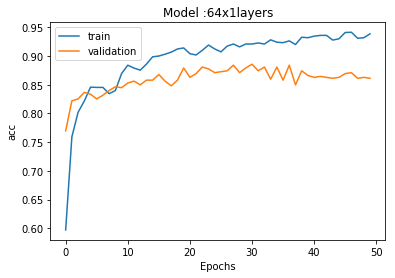

64x2layers


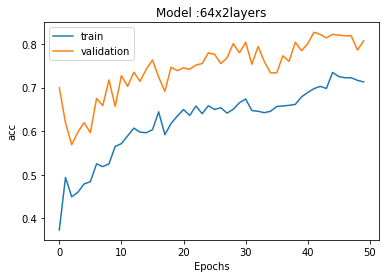

64x3layers


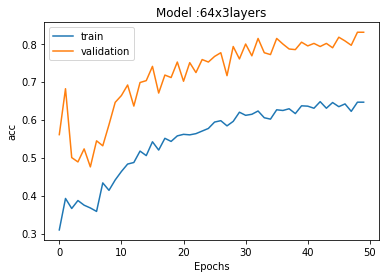

64x4layers


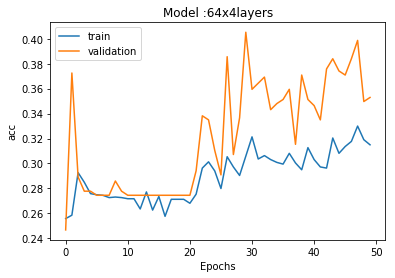

64x5layers


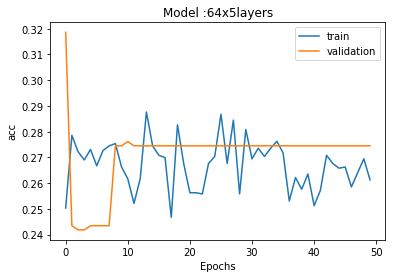

128x1layers


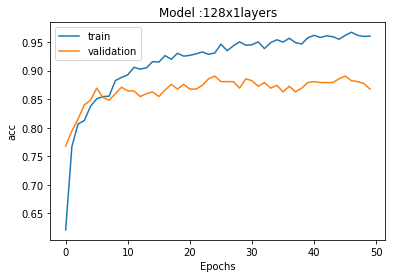

128x2layers


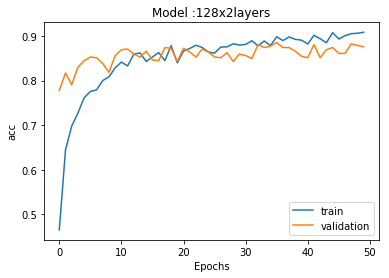

128x3layers


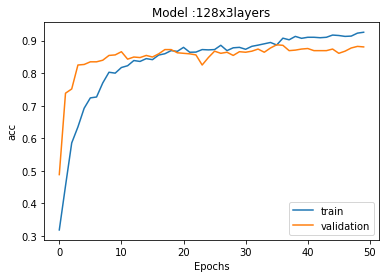

128x4layers


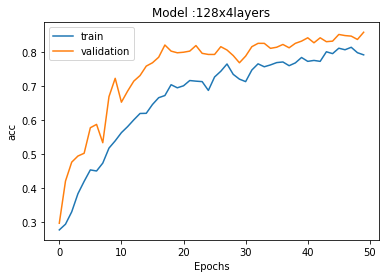

256x1layers


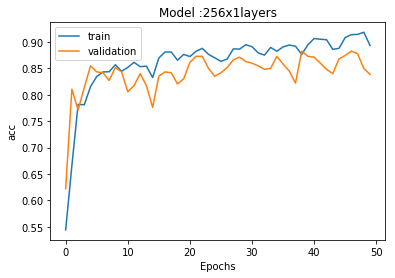

256x2layers


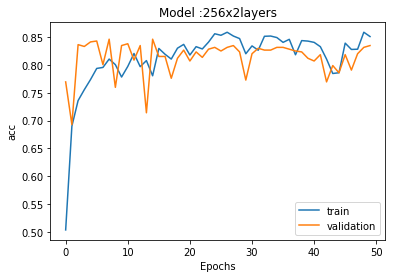

256x3layers


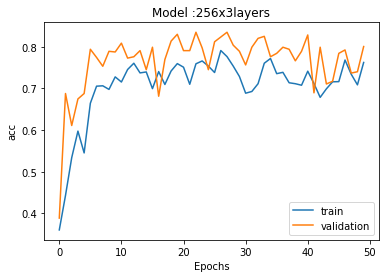

256x4layers


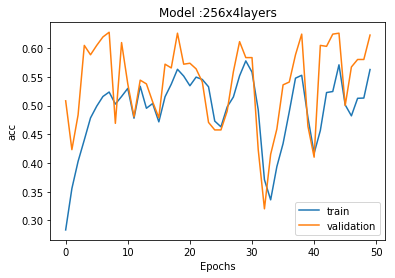

512x1layers


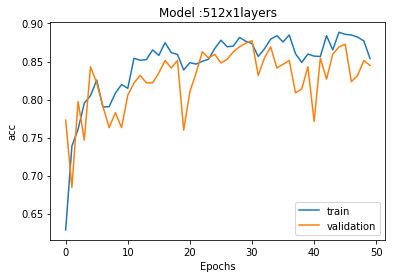

512x2layers


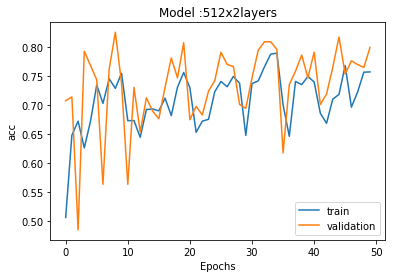

512x3layers


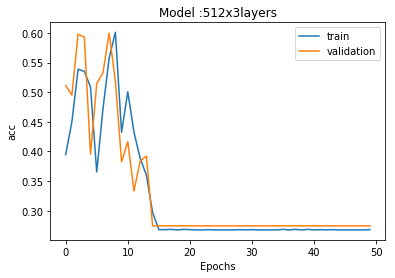

In [9]:
import matplotlib.pyplot as plt
def draw_graph(History, arg, name): #arg = acc|loss
#     plt.tight_layout()
    plt.plot(History[arg])
    val_arg = 'val_' + arg
    plt.plot(History[val_arg])
    plt.title('Model :'+ name)
    plt.ylabel(arg)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.show()

for (n_neurons,layers) in runsets:
    for i in range(1,layers+1):
        name=str(n_neurons)+'x'+str(i)+'layers'
        print(name)
        draw_graph(Histories[name],'acc',name)

# VGG on test set

In [10]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [12]:
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from keras import applications
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datasetpath = r'C:\Users\SurfacePro4\Desktop\dataset'
batch_size = 32
img_size = 128

vggmodel = applications.VGG16(include_top=False, weights='imagenet')
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split = 0.2)

In [13]:
train_generator = vgg_data_gen.flow_from_directory(
        r'C:\Users\SurfacePro4\Desktop\pongAI\dataset\training',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical', 
        shuffle=False)  

val_generator = vgg_data_gen.flow_from_directory(
        r'C:\Users\SurfacePro4\Desktop\pongAI\dataset\validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

test_generator = vgg_data_gen.flow_from_directory(
        r'C:\Users\SurfacePro4\Desktop\pongAI\dataset\testing',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical', 
        shuffle=False)  

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


In [14]:
# X_test = vggmodel.predict_generator(test_generator, len(test_generator))
# filename = 'cnn_features_test(i128b32)'
# with open(filename, 'wb') as f:
#           np.save(f, X_test)

In [15]:
from keras.utils.np_utils import to_categorical
num_classes = len(train_generator.class_indices)
nb_train_samples = len(train_generator.filenames)
nb_val_samples = len(val_generator.filenames)
nb_test_samples = len(test_generator.filenames)

with open(r'extracted features\cnn_features_training(i128b32)', 'rb') as f:
    X_train = np.load(f)
Y_train = train_generator.classes
Y_train = to_categorical(Y_train, num_classes=num_classes)

with open('extracted features\cnn_features_validation(i128b32)', 'rb') as f:
    X_val = np.load(f)
Y_val = val_generator.classes
Y_val = to_categorical(Y_val, num_classes=num_classes)

with open('extracted features\cnn_features_test(i128b32)', 'rb') as f:
    X_test = np.load(f)
Y_test = test_generator.classes
Y_test = to_categorical(Y_test, num_classes=num_classes)

Model: 128 neurons x 3 Layers on 128x128 images 32 batch size

In [20]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

name=str(128)+'x'+str(2)+'layers'
print("Model: "+name)
History = model.fit(X_train, 
                    Y_train,
                    epochs=30,
                    batch_size=batch_size,
                    validation_data=(X_val, Y_val),
                    callbacks=[early_stopping]
                    )

Model: 128x2layers
Train on 2197 samples, validate on 612 samples
Epoch 1/30
2197/2197 [==============================] - 3s 2ms/step - loss: 9.8976 - acc: 0.3177 - val_loss: 5.3622 - val_acc: 0.6193
Epoch 2/30
2197/2197 [==============================] - 1s 681us/step - loss: 8.2533 - acc: 0.4392 - val_loss: 4.1064 - val_acc: 0.6797
Epoch 3/30
2197/2197 [==============================] - 2s 713us/step - loss: 6.6400 - acc: 0.5457 - val_loss: 3.1758 - val_acc: 0.7614
Epoch 4/30
2197/2197 [==============================] - 1s 676us/step - loss: 5.7248 - acc: 0.6036 - val_loss: 3.0637 - val_acc: 0.7859
Epoch 5/30
2197/2197 [==============================] - 1s 661us/step - loss: 4.5625 - acc: 0.6837 - val_loss: 3.1184 - val_acc: 0.7892
Epoch 6/30
2197/2197 [==============================] - 2s 722us/step - loss: 4.4329 - acc: 0.6946 - val_loss: 2.2599 - val_acc: 0.8415
Epoch 7/30
2197/2197 [==============================] - 2s 689us/step - loss: 4.3700 - acc: 0.7087 - val_loss: 2.5780 - 

Confusion matrix, without normalization
309/309 [==============================] - 0s 136us/step
Accuracy: 86.41%
Loss: 2.1696575228064576


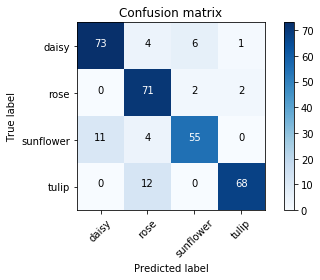

In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, test_generator.class_indices)

loss, acc = model.evaluate(X_test, Y_test)
print("Accuracy: {:.2f}%".format(acc * 100))
print("Loss: {}".format(loss))